# Tutorial 1

## Outline:
* Jupyter notebooks
* Visualizing univariate and multivariate functions
* Minimization using CG/BFGS 
* Timing your function
* Golden section example

## Visualizing univariate and multivariate functions

### Univariate function


In [3]:
# These are some imports generally needed for scientific computing
from pylab import *

# to show figures inline
%matplotlib inline  

In [2]:
def func(x):
    f=x**3-3*x+2
    return f


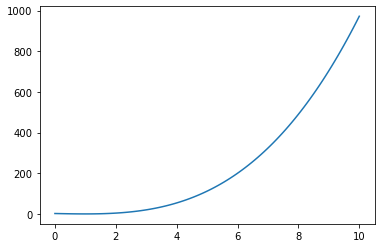

In [4]:
x = np.linspace(0,10,100)
y = func(x)
plt.plot(x,y)

### Multivariate function

I want to know what function $f(x,y)=x^4-x^2+y^2-2xy-2$ looks like. How to do this?

In [5]:
# To plot 3D graphs, you need to use 3D axes
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def func3d(x,y):
    return x**4-x**2+y**2-2*x*y-2

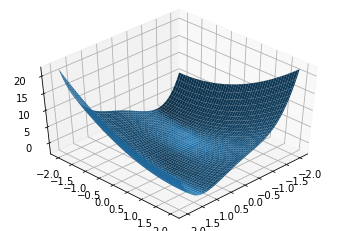

In [9]:
a = np.linspace(-2,2,100)
x,y = np.meshgrid(a,a)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,func3d(x,y))
ax.view_init(45,45)

## Minimization using CG/BFGS

The multivariate Rosenbrock function is given below:
$f(\vec{x})=\sum_{i=1}^{N-1}100(x_{i+1}-x_i^2)^2+(1-x_i^2)^2$ \
Use x0=np.array([1.3,0.7,0.8,1.9,1.2]) as starting porint and find minimum

In [12]:
from scipy.optimize import minimize

In [10]:
def Rosenbrock(X):
    f = sum(100*(X[1:]-X[:-1]**2)**2+(1-X[:-1]**2)**2)
    return f

In [14]:
x0=np.array([1.3,0.7,0.8,1.9,1.2])
res = minimize(Rosenbrock, x0, method='BFGS', # jac=rosen_der,
               options={'gtol': 1e-5, 'disp': True})
print(res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 21
         Function evaluations: 150
         Gradient evaluations: 25
      fun: 1.3311338488260017e-11
 hess_inv: array([[0.00325066, 0.00375089, 0.00606241, 0.01144279, 0.02296782],
       [0.00375089, 0.00730604, 0.0120655 , 0.02304334, 0.04615663],
       [0.00606241, 0.0120655 , 0.02424991, 0.04651413, 0.09312236],
       [0.01144279, 0.02304334, 0.04651413, 0.09410363, 0.18837574],
       [0.02296782, 0.04615663, 0.09312236, 0.18837574, 0.38205017]])
      jac: array([ 2.24757391e-06, -4.87185728e-07, -9.01139290e-07,  1.29733845e-06,
       -4.58749527e-07])
  message: 'Optimization terminated successfully.'
     nfev: 150
      nit: 21
     njev: 25
   status: 0
  success: True
        x: array([0.9999998 , 0.9999996 , 0.99999921, 0.99999843, 0.99999684])


In [16]:
res = minimize(Rosenbrock, x0, method='CG', #jac=rosen_der,
               options={'gtol': 1e-5, 'disp': True})
print(res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 43
         Function evaluations: 492
         Gradient evaluations: 82
     fun: 4.630283197642572e-11
     jac: array([-2.42480539e-06,  6.43147052e-06, -3.52883454e-07,  3.18985946e-06,
       -9.34917699e-06])
 message: 'Optimization terminated successfully.'
    nfev: 492
     nit: 43
    njev: 82
  status: 0
 success: True
       x: array([0.99999963, 0.99999927, 0.99999853, 0.99999706, 0.99999406])


More on optimization: [Scipy tutorial on optimization](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

## Time your function
using decorator!

In [17]:
import time

def timeit(f):

    def timed(*args, **kw):

        ts = time.time()
        result = f(*args, **kw)
        te = time.time()

        print('func:%r took: %2.4f sec' % (f.__name__,  te-ts))
        return result

    return timed

In [22]:
# @timeit
def Rosenbrock(X):
    f = sum(100*(X[1:]-X[:-1]**2)**2+(1-X[:-1]**2)**2)
    return f

In [19]:
Rosenbrock(x0)

func:'Rosenbrock' took: 0.0001 sec


854.8679000000001

In [23]:
@timeit
def CG():
    res = minimize(Rosenbrock, x0, method='CG', #jac=rosen_der,
               options={'gtol': 1e-5, 'disp': True})
    return res

In [24]:
CG()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 43
         Function evaluations: 492
         Gradient evaluations: 82
func:'CG' took: 0.0310 sec


     fun: 4.630283197642572e-11
     jac: array([-2.42480539e-06,  6.43147052e-06, -3.52883454e-07,  3.18985946e-06,
       -9.34917699e-06])
 message: 'Optimization terminated successfully.'
    nfev: 492
     nit: 43
    njev: 82
  status: 0
 success: True
       x: array([0.99999963, 0.99999927, 0.99999853, 0.99999706, 0.99999406])

## Golden section example

Given the following function, can you find its minimum value in range $[0,9]$ using golden section?

In [25]:
def func(x):
    isarray=type(x) is np.ndarray
    coefs=np.array([8.001371477,
-24.06731415,
37.076044,
0,
-43.86909846,
44.42701101,
-22.0126204,
6.536434989,
-1.248082478,
0.157159012,
-0.012990941,
0.000678657,
-2.03269E-05,
2.66065E-07
])
    base=np.zeros((len(x) if isarray else 1,14))
    for i in range(1,14):
        base[:,i]+=x**i
    result=base.dot(coefs)
    return result if isarray else sum(result)

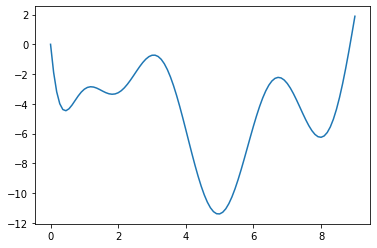

In [26]:
x = np.linspace(0,9,100)
plt.plot(x,func(x))

In [27]:
def golden_section(func,start,end,reference,tol):
    if end - start < tol:
        return {'x':reference, 'y':func(reference)}
    else:
        if reference-start < end - reference:
            new_reference = end - (end- reference)*0.618
            if func(new_reference)>func(reference):
                return golden_section(func,start,new_reference,reference,tol)
            else:
                return golden_section(func,reference,end,new_reference,tol)
        else:
            new_reference = start + (reference-start)* 0.618
            if func(new_reference)>func(reference):
                return golden_section(func,new_reference,end,reference,tol)
            else:
                return golden_section(func,start,reference,new_reference,tol)
            
            
                
            
        

In [28]:
golden_section(func,0,9,9*0.618,1e-5)

{'x': 4.964253964254607, 'y': -11.400276695145294}